<h1 style="text-align:center;">Les Concepts Statistiques Fondamentaux dans R</h1>


<u>**Auteur</u> :** [Younes Dahami](https://www.linkedin.com/in/dahami/)

In [1]:
library(readr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Introduction

Ce notebook détaille les concepts statistiques fondamentaux, illustrés avec les données des études d'imagerie cérébrale infantile, IBIS (Infant Brain Imaging Study). L'objectif principal est double :

1) Développer un ensemble de notations, de définitions et d'idées qui constituent les bases des analyses statistiques standard.

2) Présenter quelques méthodes statistiques de base et illustrer comment elles sont effectuées dans R en utilisant les données IBIS.

Les notations et concepts développés ici seront référencés à nouveau dans les notebooks ultérieurs, de sorte que ceux qui n'ont pas de formation statistique formelle seraient enclins à lire ce notebook. Pour ceux ayant une solide expérience en statistique, ce notebook devrait servir de rappel rapide ainsi que de référence pour la terminologie et la notation statistiques standard.

## 1) Inférence statistique

Pour une variable $X$, sa distribution peut être considérée comme une fonction qui indique la probabilité que $X$ soit égale à une valeur spécifique $x$, pour chaque $x$ possible.

Par exemple, si $X$ suit une distribution normale, sa distribution peut être tracée comme illustré ci-dessous :

![alt](normal_dist.png)

On peut voir que la probabilité est la plus élevée autour de $x=0$, puis diminue rapidement lorsque l'on s'éloigne de $0$. Lorsque des données réelles sont disponibles, un histogramme est souvent utilisé pour visualiser la distribution de la variable. Par exemple, l'histogramme du score total AOSI à 12 mois dans les données transversales de l'AOSI est le suivant :


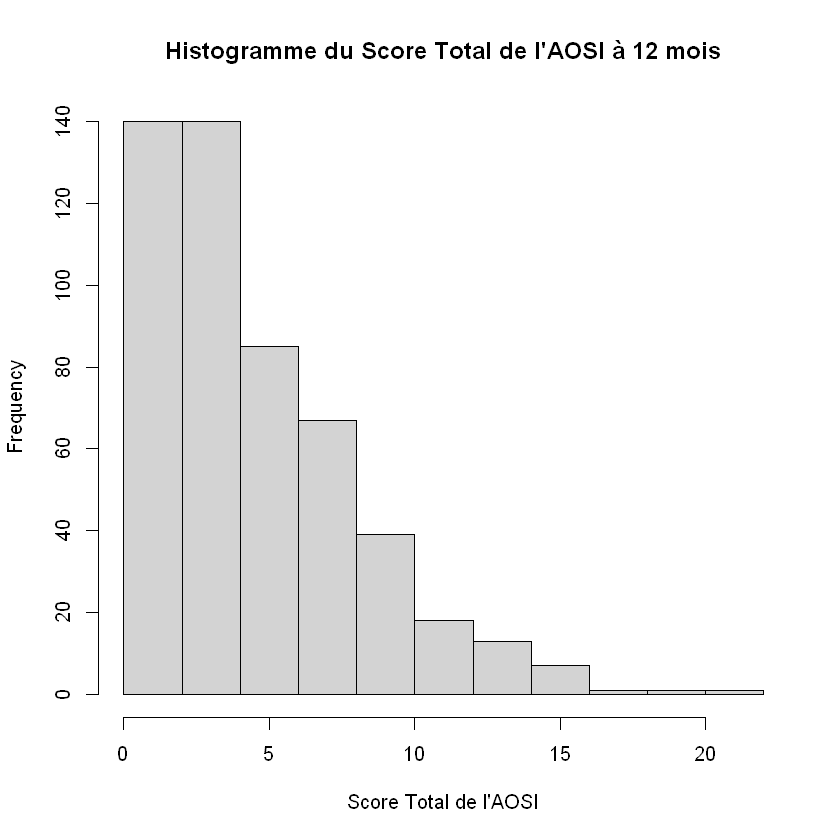

In [2]:
data <- read.csv("Cross-sec_full.csv", stringsAsFactors = FALSE, na.strings = c(" ","."))

hist(x = data$V12.aosi.total_score_1_18, xlab ="Score Total de l'AOSI", main= "Histogramme du Score Total de l'AOSI à 12 mois")

On peut voir qu'il est très probable que le score total de l'AOSI se situe entre 0 et 10, avec des valeurs supérieures à 10 peu probables.

Ce type de distribution est appelé **asymétrique (oblique)**, plus précisément **asymétrique à droite** car elle a une longue **queue** (tail) à droite et la plupart de la probabilité à gauche. Une distribution **asymétrique à gauche** est l'opposée. 

On peut aussi considérer la distribution de notre variable $X$ **conditionnelle** sur la valeur **y** d'une autre variable **Y**. Conditionnelle signifie "uniquement sur la population avec Y=y". Cela est appelé la **distribution conditionnelle** de $X$ pour $Y=y$.

Par exemple, alors que nous avons créé l'histogramme du score total AOSI pour l'ensemble de l'échantillon, nous pouvons vouloir visualiser la distribution du score total AOSI séparément pour chacun des groupes de diagnostic suivants : Risque élevé : TSA (High Risk: ASD), Risque élevé : Négatif (High Risk: Negative) et Risque faible : Négatif (Low Risk: Negative). Par exemple, nous créons l'histogramme pour le groupe Risque élevé : TSA ci-dessous :


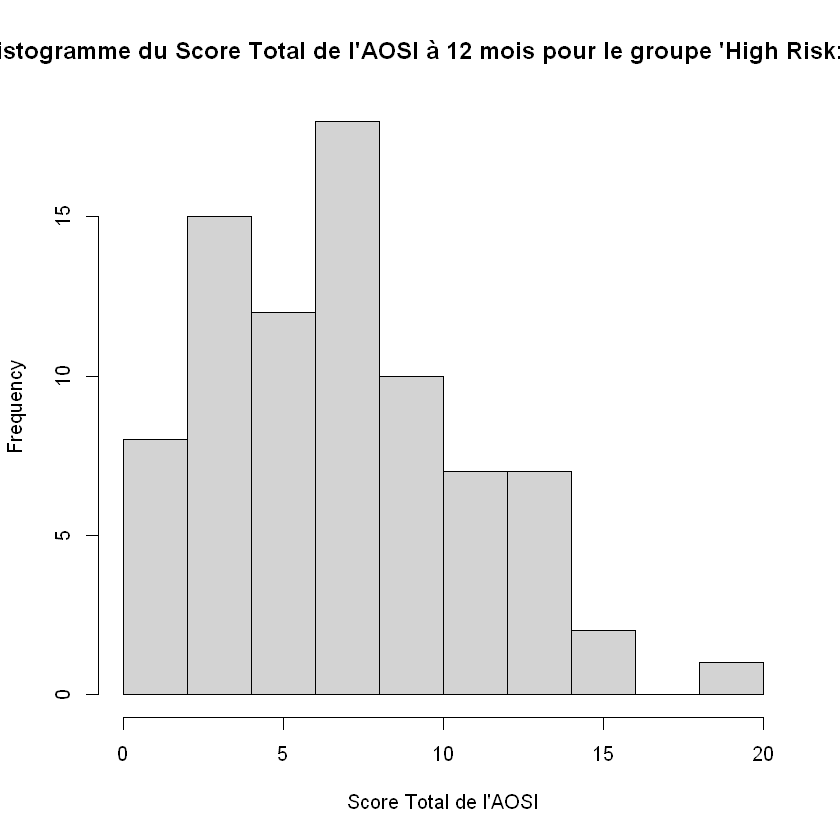

In [3]:
data_HR_ASD <- data  %>% filter(GROUP =="HR_ASD")

hist(data_HR_ASD$V12.aosi.total_score_1_18, xlab ="Score Total de l'AOSI", main= "Histogramme du Score Total de l'AOSI à 12 mois pour le groupe 'High Risk: ASD'")

On peut voir que la variable est considérée comme une chaine de caractères par défaut dans les données, il est nécessaire de la forcer à être numérique pour créer un histogramme.

Les analyses statistiques sont souvent conçues pour **estimer** certaines caractéristiques de la distribution d'une variable (ou de plusieurs variables). Ces caractéristiques sont généralement appelées **paramètres**. Souvent, ces paramètres sont la moyenne, la variance, la médiane/les quantiles, ou les probabilités de valeurs spécifiques (pour une variable discrète, c'est-à-dire la probabilité de diagnostic positif de ASD). Nous ne connaissons pas les valeurs réelles de ces paramètres, donc nous essayons d'obtenir une approximation précise d'après des échantillons aléatoires (nos données) provenant de la distribution/population d'intérêt. Ces approximations varieront d'un échantillon à l'autre en raison du hasard derrière la sélection de ces échantillons et de leur taille finie. Ainsi, nous devons également tenir compte de la **variance** de ces approximations lors de la réalisation de nos analyses.

Cette analyse, composée de l'**estimation** des paramètres ainsi que de la prise en compte de la **variance** de cette estimation, est appelée **inférence statistique**.


## 1.1) Estimation des Paramètres: Moyenne, Médiane, Quantiles

Ici, nous discutons de l'estimation de paramètres spécifiques qui sont généralement d'intérêt pour les variables continues.

Pour les variables catégorielles, voir [Les Tableaux dans R](https://github.com/Dahamey/R/blob/main/R%20%20-%20Fr/Les%20Tableaux%20dans%20R.ipynb). Ces paramètres sont la moyenne, la médiane, la variance et les quantiles. Souvent, on verra ces estimations résumées dans le "Tableau 1" des articles de recherche. Ici, nous discutons de la méthodologie derrière leur estimation ainsi que de comment calculer ces estimations dans R.

La moyenne et la médiane peuvent intuitivement être considérées comme des mesures du "centre" de la distribution. La variance peut être considérée comme une mesure de la "dispersion" de la distribution. Pour illustrer la variance, nous traçons deux distributions normales avec toutes deux une moyenne de 0 mais l'une avec une variance de 1 et l'autre avec une variance de 4. L'augmentation de la plage probable de valeurs avec une variance de 4 est assez évidente, et les probabilités sont plus étalées. Notez que l'**écart type** est simplement la racine carrée de la variance."

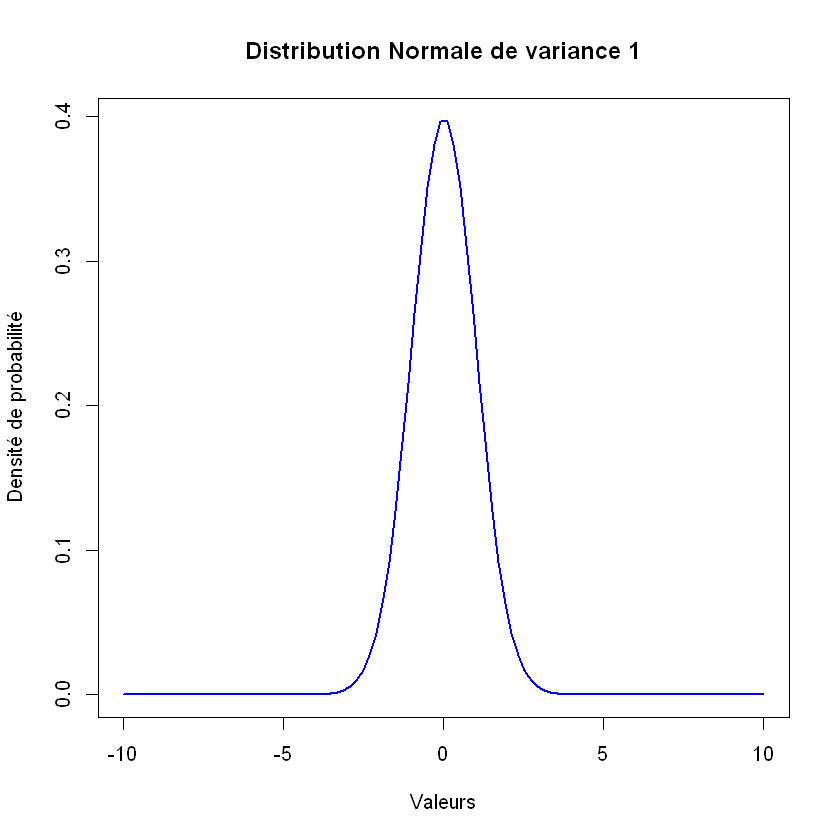

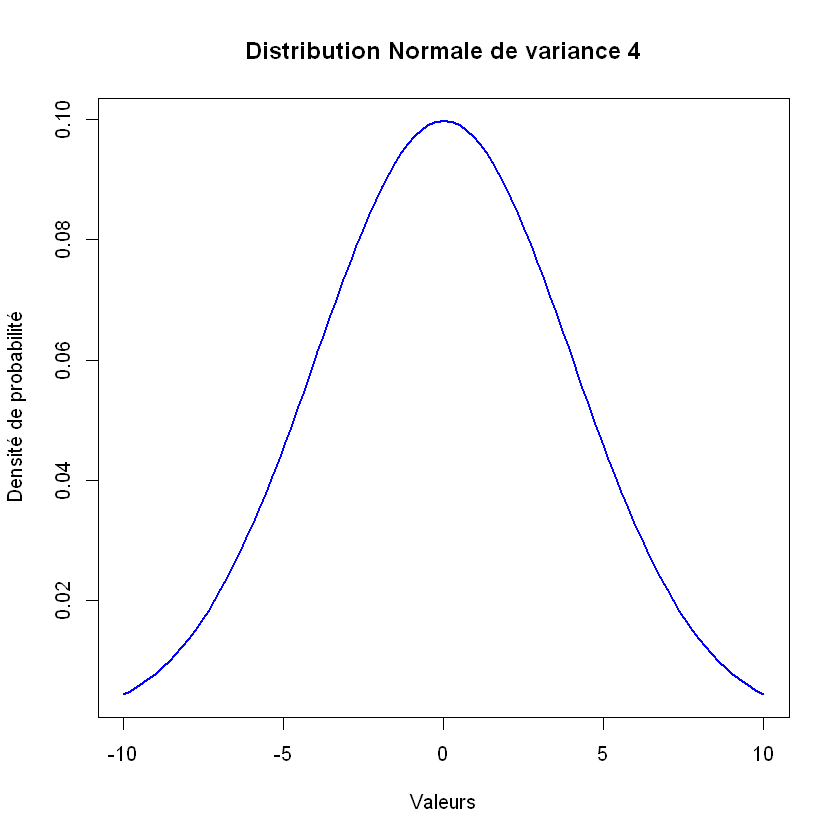

In [4]:
# Générer une séquence de valeurs x
x <- seq(-10, 10, length.out=100)

# Calculer les densités de probabilité normales pour chaque valeur de x
y1 <- dnorm(x, mean=0, sd=1)
y2 <- dnorm(x, mean=0, sd=4)

# Tracer la distribution normale
plot(x, y1, type="l", lwd=2, col="blue", xlab="Valeurs", ylab="Densité de probabilité", main="Distribution Normale de variance 1")
plot(x, y2, type="l", lwd=2, col="blue", xlab="Valeurs", ylab="Densité de probabilité", main="Distribution Normale de variance 4")


On estime la moyenne, la médiane, la variance et les quantiles de la distribution en utilisant respectivement la moyenne, la médiane, la variance et les quantiles de l'échantillon habituels. Ces estimations peuvent être calculées dans R en utilisant les fonctions **`mean()`**, **`median()`**, **`var()`** et **`quantile()`** respectivement.

Remarque : lors de l'utilisation de `quantile()`, les valeurs minimale et maximale de l'échantillon sont également fournies. Nous illustrons ces fonctions ci-dessous en utilisant le score total de l'AOSI à 12 mois. De plus, notons l'inclusion de **`na.rm=TRUE`** dans ces fonctions. Par défaut, lors du calcul de ces estimations, si une valeur manquante est rencontrée, R renvoie NA (manquante). Ainsi, nous devons dire à R de supprimer ces valeurs manquantes avant de calculer les estimations.


In [5]:
# La moyenne
mean(data$V12.aosi.total_score_1_18, na.rm = TRUE)

[1] 4.980469

In [6]:
# La variance
var(data$V12.aosi.total_score_1_18, na.rm = TRUE)

[1] 13.08377

In [7]:
# La médiane
median(data$V12.aosi.total_score_1_18, na.rm = TRUE)

[1] 4

In [8]:
# quatile
quantile(data$V12.aosi.total_score_1_18, na.rm = TRUE)

0%  25%  50%  75% 100% 
   0    2    4    7   22

Cependant, nous voulons souvent voir ces estimations (et d'autres) pour de nombreuses variables de notre ensemble de données sans avoir à calculer chacune séparément. Cela peut être fait en utilisant **`summary()`**. Ces estimations sont souvent appelées **statistiques sommaires** des données. Nous calculons les statistiques sommaires pour un certain nombre de variables dans l'ensemble de données ci-dessous :

In [9]:
data_petite <- data %>% 
    select(V12.aosi.total_score_1_18, V06.aosi.total_score_1_18,
         V12.aosi.Candidate_Age)


head(data_petite)

,V12.aosi.total_score_1_18,V06.aosi.total_score_1_18,V12.aosi.Candidate_Age
,<int>,<int>,<dbl>
1,3,8,12.5
2,10,18,12.4
3,2,4,12.9
4,3,NA,12.7
5,NA,6,NA
6,4,NA,12.1


In [10]:
summary(data_petite)

 V12.aosi.total_score_1_18 V06.aosi.total_score_1_18 V12.aosi.Candidate_Age
 Min.   : 0.00             Min.   : 1.000            Min.   : 0.00         
 1st Qu.: 2.00             1st Qu.: 7.000            1st Qu.:12.20         
 Median : 4.00             Median : 9.000            Median :12.50         
 Mean   : 4.98             Mean   : 9.562            Mean   :12.59         
 3rd Qu.: 7.00             3rd Qu.:12.000            3rd Qu.:12.90         
 Max.   :22.00             Max.   :28.000            Max.   :16.70         
 NA's   :75                NA's   :105               NA's   :75            

Il existe également plusieurs packages qui étendent la fonctionnalité de R dans le calcul de ces statistiques sommaires. Un package recommandé est le package **`Hmisc`**. Il comprend la fonction **`describe()`** qui est une version améliorée de `summary()`, `describe()` est utilisé ci-dessous avec les mêmes variables :


In [11]:
library(Hmisc)
describe(data_petite)


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units




data_petite 

 3  Variables      587  Observations
--------------------------------------------------------------------------------
V12.aosi.total_score_1_18 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     512       75       20     0.99     4.98    3.901        1        1 
     .25      .50      .75      .90      .95 
       2        4        7       10       12 
                                                                            
Value          0     1     2     3     4     5     6     7     8     9    10
Frequency     23    51    66    68    72    51    34    40    27    18    21
Proportion 0.045 0.100 0.129 0.133 0.141 0.100 0.066 0.078 0.053 0.035 0.041
                                                                
Value         11    12    13    14    15    16    17    20    22
Frequency     10     8     7     6     4     3     1     1     1
Proportion 0.020 0.016 0.014 0.012 0.008 0.006 0.002 0.002 0.002

For the frequency table, variable 

## 1.2) Prise en compte de la variance d'estimation et des tests d'hypothèse

Bien que ces estimations fournissent des approximations des paramètres d'intérêt, elles :

1) comportent une certaine marge d'erreur

2) varient d'un échantillon à l'autre.

Pour illustrer cela, 5 ensembles de données simulés, chacun de taille 100 et avec une seule variable, sont générés sous une moyenne de 0. La moyenne de l'échantillon est calculée pour chacun de ces 5 échantillons. Nous constatons que

1) ces moyennes d'échantillon diffèrent d'un échantillon à l'autre

2) aucune n'est exactement égale à 0.

Ainsi, nous devons tenir compte de cette variance lors de la fourniture des approximations.


In [12]:
data_simul <- list()

for(i in 1:5){
    data_simul[[i]] <- rnorm(100, 0, 1) # simuler 100 obs de moyenne 0 et variance 1 
}

lapply(data_simul, mean)

[[1]]
[1] 0.2216701

[[2]]
[1] -0.09868589

[[3]]
[1] -0.05048328

[[4]]
[1] 0.0002941637

[[5]]
[1] -0.06188693

## 1.3) Intervalles de confiance

Cela se fait généralement en incluant un **intervalle de confiance** avec notre approximation, plus précisément un **intervalle de confiance de $x$%** où $x$ est un nombre compris entre 0 et 100. 

Intuitivement, nous pouvons interpréter un intervalle de confiance comme une plage "raisonnable" de valeurs pour le paramètre d'intérêt en fonction de nos données. Augmenter le pourcentage de l'intervalle de confiance augmente sa largeur, et donc augmente les chances que l'intervalle de confiance à partir d'un échantillon contienne le vrai paramètre. Cependant, cette augmentation de la largeur diminue également la précision des informations que nous recevons de l'intervalle de confiance, il y a donc un compromis. Généralement, on utilise 95% (bien que ce ne soit qu'une convention).

À titre d'exemple, nous envisageons de calculer un intervalle de confiance pour la moyenne. Considérez le score total de l'AOSI à 12 mois à partir de notre ensemble de données. Nous avons déjà calculé une estimation de la moyenne, ajoutons un intervalle de confiance à cette estimation. Cela peut être fait en utilisant la fonction **`t.test()`** (qui a d'autres utilisations que nous couvrons plus tard).


In [13]:
mean(data$V12.aosi.total_score_1_18, na.rm = TRUE)

[1] 4.980469

In [14]:
resultats <- t.test(data$V12.aosi.total_score_1_18, conf.level = 0.95)
resultats


	One Sample t-test

data:  data$V12.aosi.total_score_1_18
t = 31.156, df = 511, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 4.666411 5.294526
sample estimates:
mean of x 
 4.980469 


Concentrons-nous sur le bas de la sortie pour le moment, nous couvrirons le haut plus tard. Nous constatons que nous approchons que le score total moyen de l'AOSI à 12 mois dans la population est de 4.98 et un ensemble raisonnable de valeurs pour cette moyenne dans la population est de 4.67 à 5.29 en utilisant un intervalle de confiance de 95%.


In [15]:
# Extraction de l'intervalle de confiance
int_conf <- resultats$conf.int
int_conf

[1] 4.666411 5.294526
attr(,"conf.level")
[1] 0.95

In [16]:
resultats$statistic

t 
31.15579

In [17]:
resultats$parameter

df 
511

In [18]:
resultats$p.value

[1] 3.254175e-120

In [19]:
resultats$estimate

mean of x 
 4.980469

In [20]:
resultats$null.value

mean 
   0

In [21]:
resultats$stderr

[1] 0.1598569

Calculon manuellement l'erreur standard :

In [22]:
# écart-type
ecart_type <- sd(data$V12.aosi.total_score_1_18, na.rm = TRUE)
ecart_type

[1] 3.617149

In [23]:
# écart-type
sqrt(var(data$V12.aosi.total_score_1_18, na.rm = TRUE))

[1] 3.617149

In [24]:
# SE = s/sqrt(n)
ecart_type / sqrt(length(data$V12.aosi.total_score_1_18))

[1] 0.1492957

In [25]:
# Intervalle de confiance manuellement : Z_score = 1.96 pour 95% niveau de confidence
lim_sup <- mean(data$V12.aosi.total_score_1_18, na.rm = TRUE) + 1.96 * ecart_type / sqrt(length(data$V12.aosi.total_score_1_18))
lim_sup

[1] 5.273088

In [26]:
lim_inf <- mean(data$V12.aosi.total_score_1_18, na.rm = TRUE) - 1.96 * ecart_type / sqrt(length(data$V12.aosi.total_score_1_18))
lim_inf

[1] 4.687849

In [27]:
resultats$alternative

[1] "two.sided"

In [28]:
resultats$method

[1] "One Sample t-test"

In [29]:
resultats$data.name

[1] "data$V12.aosi.total_score_1_18"

## 1.4) Test d'hypothèse

Pour conclure sur un paramètre à partir des informations de l'échantillon, on utilise généralement des **tests d'hypothèse.**

Le cadre est le suivant : supposons que nous voulons déduire si la moyenne pour une variable est une certaine valeur, disons $\mu_0$. À partir des données que nous avons, nous aimerions faire une supposition éclairée sur l'affirmation selon laquelle la moyenne est $\mu_0$. Le principe principal de la recherche scientifique est que l'on fait une affirmation ou une hypothèse, on réalise une expérience et on voit si les résultats de l'expérience contredisent l'affirmation. C'est le même raisonnement qui régit les tests d'hypothèse.

Pour commencer, nous formulons une affirmation que nous aimerions "réfuter" (par exemple, un traitement n'a aucun effet). Cette affirmation est appelée **l'hypothèse nulle.** Par exemple, considérons l'hypothèse nulle selon laquelle la moyenne est $\mu_0$. Nous définissons ensuite la contradiction à cette affirmation, à savoir que la moyenne n'est PAS $\mu_0$, comme **l'hypothèse alternative.** Enfin, nous prenons les informations de nos données et nous voyons s'il y a suffisamment de preuves pour **rejeter** l'hypothèse nulle en faveur de l'alternative. S'il n'y a pas suffisamment de preuves, nous **ne parvenons pas à rejeter** l'hypothèse nulle. Autrement dit, nous **n'acceptons jamais** l'hypothèse nulle ou ne prouvons pas que l'hypothèse nulle est vraie. Rappelons que la nulle est notre affirmation de base que nous cherchons à réfuter, si nous acceptons la nulle, nous "prouverions" que ce que nous avons initialement affirmé est vrai.

**Comment déterminons-nous si nous avons "suffisamment de preuves" pour rejeter la nulle ?**

Le processus suivant est généralement utilisé. Tout d'abord, nous réduisons nos données à une seule valeur qui est liée à l'hypothèse testée. Cette valeur est appelée une **statistique de test**. Ensuite, nous voyons dans quelle mesure la statistique de test observée de nos données s'écarte de la plage de valeurs que nous attendrions si l'hypothèse nulle était vraie. Si cet écart est suffisamment grand, nous décidons de rejeter la nulle. Sinon, nous ne parvenons pas à rejeter.


Cela s'explique mieux par un exemple :

Considérons notre hypothèse nulle selon laquelle la moyenne est $\mu_0$. Intuitivement, nous calculerions la moyenne de l'échantillon et l'utiliserions comme statistique de test, et comparerions sa valeur à $\mu_0$. Si la moyenne de l'échantillon est "proche" de $\mu_0$, nous ne parviendrons pas à rejeter, sinon nous rejetterions. Par exemple, rappelons que pour le score total de l'AOSI à 12 mois, la moyenne de l'échantillon était de $4.98$. Pour notre hypothèse nulle selon laquelle la moyenne de la population était $\mu_0=5$, nous n'aurions probablement pas suffisamment de preuves pour rejeter la nulle. Cependant, nous avons besoin d'une manière formelle de mesurer l'écart par rapport à la nulle, de préférence une qui soit indépendante des unités de la variable. La **valeur p** sert de mesure.

Formellement :

* **<u>la valeur p**</u> **:** mesure la probabilité de voir une valeur de statistique de test aussi extrême ou plus extrême que l'hypothèse nulle que la valeur de statistique de test que vous avez réellement observée.

Informellement, nous pouvons considérer une valeur p comme une mesure indépendante des unités de la mesure dans laquelle nos données s'écartent de l'hypothèse nulle. Nous calculons la valeur p en utilisant la valeur observée de la statistique de test ainsi que la **distribution de la statistique de test** (également appelée sa **distribution d'échantillonnage**). Cette distribution est comment nous sommes capables de calculer la probabilité que la valeur p reflète.

Pour mener le test d'hypothèse correspondant à l'hypothèse nulle selon laquelle la moyenne de la population est 0, un **test t à un échantillon (one sample t-test)** est souvent utilisé. Nous couvrirons cela plus en détail plus tard, ici, nous l'utilisons pour illustrer les concepts ci-dessus. La fonction **`t.test()`** peut également être utilisée pour mener ce test d'hypothèse. Nous considérons le test si la moyenne du score total de l'AOSI à 12 mois est 0. Notons que nous pouvons choisir une valeur différente de 0 à utiliser dans notre hypothèse nulle en ajoutant l'argument $mu=x$, où $x$ est la valeur d'intérêt.


In [30]:
t.test(data$V12.aosi.total_score_1_18)


	One Sample t-test

data:  data$V12.aosi.total_score_1_18
t = 31.156, df = 511, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 4.666411 5.294526
sample estimates:
mean of x 
 4.980469 


La partie supérieure de la sortie contient les résultats du test d'hypothèse. Nous voyons que la statistique de test (indiquée par $t$) est de $31.156$ et la valeur $p$ correspondante est essentiellement $0.$ Notons qu'il y a une correspondance biunivoque (une correspondance qui d'un élément d'un premier ensemble fait passer à un seul élément d'un second, et réciproquement) entre la valeur de la statistique de test et la valeur $p.$ Ainsi, il suffit de rapporter uniquement la valeur$ p.$ Nous voyons que la valeur $p$ est très petite, une petite valeur $p$ implique que les données s'écartent de la nulle. Cependant, pour prendre une décision de rejet ou de non-rejet, nous devons fixer un seuil pour cette valeur $p.$ Généralement, les gens choisissent $0.05$ comme seuil, en dessous de $0.05,$ cela implique que les preuves sont suffisamment fortes pour rejeter et au-dessus de $0.05,$ cela implique que les preuves ne sont pas suffisantes. Cependant, c'est juste une règle empirique et on pourrait justifier un seuil différent.

De plus, il peut ne pas être sage de prendre une décision tout ou rien en termes de juger de la valeur scientifique des résultats. Utiliser un seuil de valeur $p$ implique qu'une valeur $p$ de $0.051$ a la même interprétation qu'une valeur $p$ de $0.51$ et qu'une valeur $p$ de $0.049$ est une preuve "significative" tandis qu'une valeur $p$ de $0.051$ ne l'est pas. Cela limite considérablement l'information scientifique fournie par les résultats. Il est préférable d'interpréter les valeurs $p$ de manière plus large et en termes de force de preuve. Par exemple, une valeur $p$ de $0.06$ ou $0.025$ peut indiquer une "forte preuve" en faveur de l'hypothèse alternative et $0.10$ ou $0.12$ peut indiquer une "preuve modérée". Réduire simplement l'interprétation à "significatif" ou "non significatif" n'est pas optimal et devrait être évité.


## 1.5) Tests d'hypothèses avec les moyennes

Ici, nous couvrons les méthodes pour mener des tests d'hypothèses avec les moyennes de population. Nous couvrons les **tests t** et **ANOVA**. Nous illustrons cela en utilisant le score total AOSI à 12 mois et le groupe de diagnostic (High Risk: ASD, High Risk: Negative, Low Risk: Negative).

### 1.5.1) Tests t (test de Student) : Un échantillon

En anglais : **One Sample t-tests**

Tout d'abord, considérons le test de l'hypothèse nulle selon laquelle la moyenne du score total AOSI à 12 mois est de 0 dans la population. Comme discuté précédemment, cette **comparaison d'une seule moyenne à une valeur** est généralement effectuée avec un **test t pour un échantillon**. Rappelons-nous que chaque fois que nous faisons un test d'hypothèse, nous avons besoin des éléments suivants :

1) Statistique de test
2) Distribution de la statistique de test
3) Valeur $p$ de cette distribution et de la valeur observée de la statistique de test

Dans ce cas, la statistique de test est notée par $t$ car elle a une **distribution $t$**. Cette statistique de test $t$ est égale à la moyenne de l'échantillon moins la valeur nulle (souvent 0) puis divisée par l'étendue de la moyenne de l'échantillon (appelée **erreur standard**) :

$$t = \frac{\bar{X} - \mu}{s/\sqrt{n}}$$

où :

* $\bar{X}$ est la moyenne de l'echantillon
* $\mu$ est la moyenne de l'hypothèse nulle 
* $s$ est l'écart-type de l'echantillon

Voir le projet que nous avions déjà fait regardant [les tests statistiques sur Python](https://github.com/Dahamey/Hypothesis-Testing/blob/main/Python/Hypothesis%20Tests%20in%20Python%20.ipynb)

Les distributions $T$ sont différenciées par le paramètre appelé **degrés de liberté** (similaire à la manière dont les distributions normales sont différenciées par leur moyenne et leur variance). En utilisant la valeur de $T$ avec la valeur des degrés de liberté et la distribution $T$, les composantes 1) et 2), nous pouvons calculer une valeur $p.$ Ces trois composantes sont fournies dans la sortie de **`t.test()`**, ainsi que l'hypothèse alternative du test (que la moyenne n'est pas de 0).


In [31]:
t.test(data$V12.aosi.total_score_1_18)


	One Sample t-test

data:  data$V12.aosi.total_score_1_18
t = 31.156, df = 511, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 4.666411 5.294526
sample estimates:
mean of x 
 4.980469 


* Nous voyons qu'avec une valeur $p$ d'environ 0, nous avons des preuves solides en faveur du fait que la moyenne du score total AOSI à 12 mois n'est pas égale à 0.

* Remarquons également que nous pouvons voir que 0 est bien en dehors de l'intervalle de confiance à 95 %, ce qui indique que 0 n'est pas une valeur raisonnable pour la moyenne de la population basée sur ce jeu de données (ce qui pointe vers l'hypothèse alternative). Il s'avère que les valeurs $p$ et les intervalles de confiance sont généralement liés et seront en accord de cette manière **par leur conception**.

Notons que pour que ce processus soit valide, certaines hypothèses (assumptions) sont faites. Elles sont :

* **a) Le score total AOSI à 12 mois est distribué normalement**

* **b) Toutes les observations sont indépendantes.**

Si une ou plusieurs de ces hypothèses sont violées, les résultats de notre test t pour un échantillon seront invalides.


### 1.5.2) Tests t (test de Student) : Deux echantillons

En anglais : **Two-Sample t-tests.**

Maintenant, supposons que nous voulions **comparer la moyenne** du score total AOSI à 12 mois **entre deux groupes** de diagnostic, tels que High Risk: ASD et High Risk: Negative.

Plus précisément, l'hypothèse nulle sera que les moyennes sont les mêmes entre les deux groupes. Le test correspondant courant est appelé un **test t à deux échantillons**. Encore une fois, nous utilisons la fonction **`t.test()`**. Ici, nous utilisons la notation **`y~x `**où **x** est la variable de regroupement pour effectuer le test à deux échantillons. Nous obtiendrons à nouveau une statistique de test $t,$ des degrés de liberté et une valeur $p.$ Comme dans le cas d'un échantillon, cette statistique de test a également une distribution $t$.

In [32]:
head(data)

,Identifiers,SSM_ASD_v24,V24.demographics.Risk,GROUP,Study_Site,Gender,V06.aosi.Candidate_Age,V12.aosi.Candidate_Age,V06.aosi.total_score_1_18,V12.aosi.total_score_1_18,⋯,V06.mullen.Candidate_Age,V12.mullen.Candidate_Age,V36.mullen.cognitive_t_score_sum,V24.mullen.cognitive_t_score_sum,V06.mullen.cognitive_t_score_sum,V12.mullen.cognitive_t_score_sum,V36.mullen.composite_standard_score,V24.mullen.composite_standard_score,V06.mullen.composite_standard_score,V12.mullen.composite_standard_score
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,YES_ASD,HR,HR_ASD,PHI,Male,7.1,12.5,8,3,⋯,7.1,12.5,153,123,179,172,77,65,90,86
2,2,YES_ASD,HR,HR_ASD,PHI,Male,6.1,12.4,18,10,⋯,6.1,12.4,110,124,170,124,59,65,85,65
3,3,YES_ASD,HR,HR_ASD,PHI,Male,6.6,12.9,4,2,⋯,6.6,12.9,117,134,183,219,62,69,92,110
4,4,YES_ASD,HR,HR_ASD,PHI,Male,NA,12.7,NA,3,⋯,NA,12.7,152,107,NA,219,77,58,NA,110
5,5,NO_ASD,HR,HR_neg,PHI,Male,6.8,NA,6,NA,⋯,6.8,NA,226,173,226,NA,113,87,113,NA
6,6,NO_ASD,HR,HR_neg,PHI,Male,NA,12.1,NA,4,⋯,NA,12.1,184,196,NA,155,92,98,NA,78


In [33]:
data_high_risk <- data  %>% 
    filter((GROUP == "HR_ASD") | (GROUP =="HR_neg"))

t.test(data = data_high_risk, V12.aosi.total_score_1_18~GROUP)


	Welch Two Sample t-test

data:  V12.aosi.total_score_1_18 by GROUP
t = 4.9977, df = 113.84, p-value = 2.119e-06
alternative hypothesis: true difference in means between group HR_ASD and group HR_neg is not equal to 0
95 percent confidence interval:
 1.506931 3.486090
sample estimates:
mean in group HR_ASD mean in group HR_neg 
            7.337500             4.840989 


Nous pouvons voir que R fournit ce qui suit, en commençant par le haut :

1) Statistique de test $t,$ degrés de liberté et valeur $p$
2) Hypothèse alternative
3) Intervalle de confiance à $95\%$ pour la **différence des moyennes**
4) Moyennes des échantillons pour chaque groupe

Nous constatons que, comme prévu, sur la base d'une valeur $p$ d'environ 0, nous avons des preuves solides que les scores totaux moyens AOSI à 12 mois sont différents entre High Risk: ASD et High Risk: Negative. Cela peut également être observé en voyant que 0 est loin de l'intervalle de confiance et que les moyennes des échantillons de 7.34 et 4.84 sont assez différentes l'une de l'autre.


### 1.5.3) ANOVA (Analysis of Variance)

Supposons que nous voulions **comparer les moyennes de plus de deux groupes.** Par exemple, supposons que nous voulions comparer la moyenne du score total AOSI à 12 mois pour les groupes High Risk: ASD et High Risk: Negative, et à Lwo Risk: Negative. Cela se fait en utilisant un **test F ANOVA**. 

L'hypothèse nulle est que la moyenne du score total AOSI à 12 mois est la même dans les trois groupes. L'alternative est qu'au moins une moyenne de groupe diffère du reste.

Nous pouvons réaliser ce test dans R en utilisant **`aov()`**. Encore une fois, la fonction utilise la notation de formule (**`y~x`**). Nous effectuons ce test ci-dessous. Notons que de nombreux composants sont calculés par R pour ce test. Pour obtenir les principales valeurs d'intérêt, nous devons enregistrer la sortie en tant qu'objet (qui stocke tous les composants) et ensuite utiliser la fonction **`summary()`** sur cet objet :


In [35]:
unique(data$GROUP)

[1] "HR_ASD" "HR_neg" "LR_neg" "LR_ASD"

In [36]:
objet_aov <- aov(V12.aosi.total_score_1_18~GROUP, data= data)
objet_aov

Call:
   aov(formula = V12.aosi.total_score_1_18 ~ GROUP, data = data)

Terms:
                   GROUP Residuals
Sum of Squares   599.433  6086.371
Deg. of Freedom        3       508

Residual standard error: 3.461365
Estimated effects may be unbalanced
75 observations deleted due to missingness

In [37]:
summary(objet_aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
GROUP         3    599  199.81   16.68 2.39e-10 ***
Residuals   508   6086   11.98                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
75 observations deleted due to missingness

Nous voyons que les degrés de liberté sont fournis (3 et 508 dans cet exemple), la valeur de la statistique de test (valeur $F=16.68$) et la valeur $p$ correspondante (2.39e-10 ou essentiellement 0).

Pour un test F ANOVA, la statistique de test $F$ suit une distribution $F$. Une distribution $F$ est définie par deux paramètres de degrés de liberté. En utilisant cette valeur de statistique $F$ et la distribution $F$, la valeur $p$ peut être calculée.


#### La statistique de test $F$ 

La statistique de test $F$ est un outil fondamental en statistique, principalement utilisé dans l'analyse de la variance (ANOVA) et dans la régression linéaire. Elle permet de comparer la variabilité entre plusieurs groupes ou plusieurs modèles par rapport à la variabilité au sein de ces groupes ou de ces modèles. La statistique de test $F$ suit une distribution de probabilité $F$, qui est une distribution de probabilité continue et positive.

* <u>**La statistique de test $F$**</u> **:** est définie comme le rapport des variances entre deux échantillons ou entre deux modèles. Formellement, si `SS_entre` est la somme des carrés des écarts entre les moyennes des groupes (ou des modèles) et `SS_erreur` est la somme des carrés des écarts à l'intérieur des groupes (ou des modèles), alors la statistique de test `F` est calculée comme suit :

$$F = \frac{SS_{entre} / (df_{entre})}{SS_{erreur} / (df_{erreur})} $$

où `df_entre` est le nombre de degrés de liberté associés à la variance entre les groupes (ou les modèles), et `df_erreur` est le nombre de degrés de liberté associés à la variance à l'intérieur des groupes (ou des modèles).

#### Utilisation de $F$

1. **Analyse de la variance (ANOVA)** :
   - En ANOVA à un facteur (One-way ANOVA), $F$ est utilisé pour tester si les moyennes de plusieurs groupes sont égales ou non.
   
   - En ANOVA à deux facteurs (Two-way ANOVA) ou plus, $F$ est utilisé pour tester l'interaction entre les facteurs ainsi que les effets principaux.

2. **Régression linéaire** :
   - En régression linéaire simple, $F$ peut être utilisé pour tester si la pente de la droite de régression est significativement différente de zéro.
   
   - En régression linéaire multiple, $F$ est utilisé pour tester la significativité globale du modèle.

#### Interprétation de $F$

Pour interpréter la statistique de test $F$, on compare sa valeur critique à la valeur observée. Si la valeur observée de $F$ est plus grande que la valeur critique, on rejette l'hypothèse nulle, ce qui signifie qu'il y a une différence significative entre les groupes ou les modèles. Sinon, on ne peut pas rejeter l'hypothèse nulle, ce qui signifie qu'il n'y a pas de différence significative.

La statistique de test $F$ est un outil puissant pour comparer les variances entre les groupes ou les modèles dans diverses analyses statistiques, offrant une méthode quantitative pour évaluer les différences et les effets dans les données.


Alors qu'un test $F$ ANOVA permettra d'inférer si les groupes diffèrent globalement, nous aimerions savoir **quels** groupes diffèrent. Cela se fait généralement en effectuant toutes les comparaisons deux à deux.

Pour notre exemple, cela impliquerait des tests d'hypothèse pour 

1) HR: ASD vs HR: Negative,
2) HR: ASD vs LR: Negative,
3) HR: Negative vs LR: Negative, etc. pour 6 tests au total.

Rappelons-nous que lors de la comparaison des moyennes de deux groupes, nous pouvons utiliser un test $t$ à deux échantillons. Pour chaque test par paire, nous utilisons ce test $t$ à deux échantillons. Ensuite, nous interprétons les résultats du test pour chaque paire séparément. Cela est fréquemment appelé analyse **post-hoc**. Il s'avère que parce que nous effectuons plusieurs tests d'hypothèse en même temps, nous devons "corriger" (ajuster) chaque valeur $p$ de ces comparaisons par paire pour tenir compte de cette **comparaison multiple**.

Généralement, la correction effectuée est appelée **Méthode de Tukey**, bien que d'autres corrections telles que **Bonferroni** ou **Méthode de Holm** peuvent également être utilisées. Ces **valeurs $p$ corrigées** peuvent ensuite être interprétées "valablement" comme des valeurs $p$ habituelles. Pour effectuer cette analyse post-hoc dans R en utilisant la Méthode de Tukey, nous utilisons la fonction **`TukeyASD()`** avec l'objet provenant de `aov()` :

In [38]:
TukeyHSD(objet_aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = V12.aosi.total_score_1_18 ~ GROUP, data = data)

$GROUP
                    diff       lwr         upr     p adj
HR_neg-HR_ASD -2.4965106 -3.626229 -1.36679183 0.0000001
LR_ASD-HR_ASD -3.6708333 -8.917563  1.57589610 0.2728961
LR_neg-HR_ASD -3.3511986 -4.592245 -2.11015217 0.0000000
LR_ASD-HR_neg -1.1743227 -6.352589  4.00394397 0.9367305
LR_neg-HR_neg -0.8546880 -1.763793  0.05441738 0.0740168
LR_neg-LR_ASD  0.3196347 -4.884054  5.52332358 0.9985859


La sortie contient les éléments suivants :

1) Différence entre les moyennes des échantillons entre les groupes (diff)

2) Intervalle de confiance à 95 % pour chaque différence de moyenne (lwr et upr)

3) Valeurs $p$ corrigées pour chaque comparaison par paire (p adj)

Cette analyse ANOVA entière fournit des résultats valides sous les hypothèses (assumptions) suivantes :

1) Les valeurs de tous les groupes sont distribuées normalement **avec la même variance**

2) Toutes les observations sont indépendantes (à la fois au sein des groupes et entre les groupes)

La première hypothèse peut être vérifiée visuellement à l'aide d'un histogramme et en estimant les variances avec des intervalles de confiance, ou en effectuant des tests d'hypothèses pour des variances égales. La deuxième hypothèse est vérifiée en fonction de l'étude à partir de laquelle les données ont été obtenues.


In [39]:
library(ggplot2)

In [46]:
?geom_histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_bin()`)."


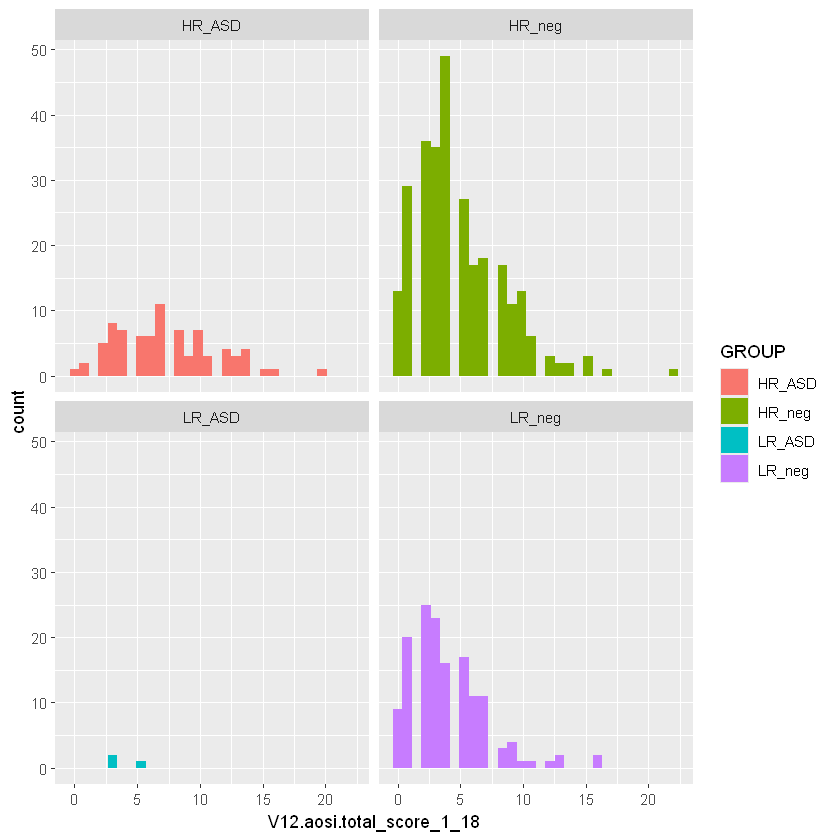

In [47]:
ggplot(data = data, aes(x = V12.aosi.total_score_1_18, fill = GROUP)) +
  geom_histogram()+
  facet_wrap(~ GROUP, ncol = 2)

 * <u>**Liens importants**</u> **:** 
 
     * [Les Tableaux dans R](https://github.com/Dahamey/R/blob/main/R%20%20-%20Fr/Les%20Tableaux%20dans%20R.ipynb)
     * [les tests statistiques sur Python](https://github.com/Dahamey/Hypothesis-Testing/blob/main/Python/Hypothesis%20Tests%20in%20Python%20.ipynb)
 

# Changement d'enregistrement


| Date (YYYY-MM-DD) | Version | Changé Par      | Description du Changement |
| ----------------- | ------- | -------------   | ----------------------- |
| 2024-01-09       | 1.0     | Younes Dahami   |  version initiale|